In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("C:/Users/sushm/Downloads/global_cancer_patients_2015_2024.csv")
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,54.421540,20.224451,20.00,37.000,54.00,72.00,89.00
Year,50000.0,2019.480520,2.871485,2015.00,2017.000,2019.00,2022.00,2024.00
Genetic_Risk,50000.0,5.001698,2.885773,0.00,2.500,5.00,7.50,10.00
Air_Pollution,50000.0,5.010126,2.888399,0.00,2.500,5.00,7.50,10.00
Alcohol_Use,50000.0,5.010880,2.888769,0.00,2.500,5.00,7.50,10.00
Smoking,50000.0,4.989826,2.881579,0.00,2.500,5.00,7.50,10.00
Obesity_Level,50000.0,4.991176,2.894504,0.00,2.500,5.00,7.50,10.00
Treatment_Cost_USD,50000.0,52467.298239,27363.229379,5000.05,28686.225,52474.31,76232.72,99999.84
Survival_Years,50000.0,5.006462,2.883335,0.00,2.500,5.00,7.50,10.00
Target_Severity_Score,50000.0,4.951207,1.199677,0.90,4.120,4.95,5.78,9.16


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

In [7]:
df.rename(columns={'Country_Region':'Country'},inplace =True)

In [8]:
numerical_features = df.select_dtypes(include=['int','float']).columns.tolist()
numerical_features

['Age',
 'Year',
 'Genetic_Risk',
 'Air_Pollution',
 'Alcohol_Use',
 'Smoking',
 'Obesity_Level',
 'Treatment_Cost_USD',
 'Survival_Years',
 'Target_Severity_Score']

In [9]:
categorical_features = df.select_dtypes(include=['object','category','boolean']).columns.tolist()
categorical_features

['Patient_ID', 'Gender', 'Country', 'Cancer_Type', 'Cancer_Stage']

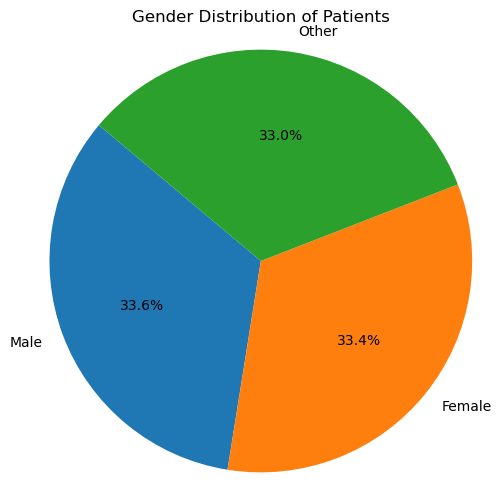

In [10]:
# Count gender values
gender_counts = df['Gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Patients')
plt.axis('equal') 
plt.show()

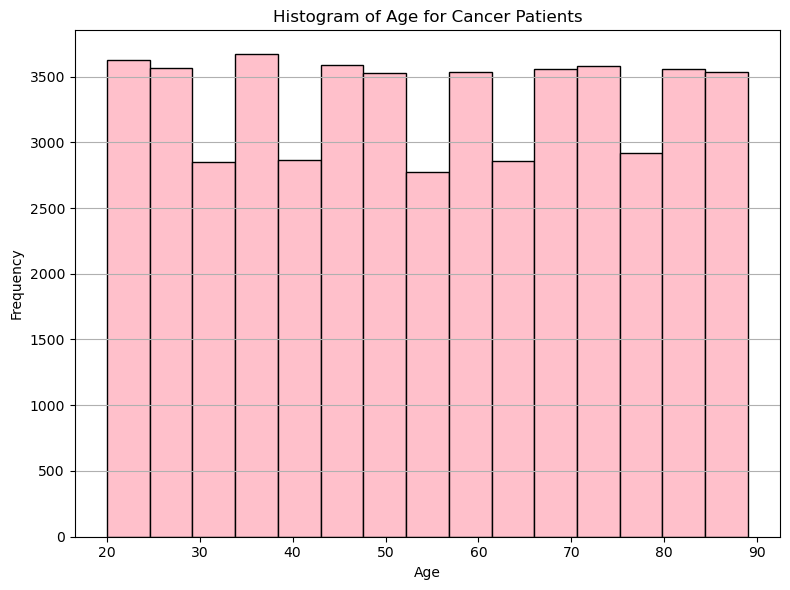

In [11]:
# Filter the data for patients with a Target Severity Score above a certain threshold (indicating cancer presence)
cancer_patients = df[df['Target_Severity_Score'] > 0]  # Adjust threshold based on your data

# Plot the histogram of Age for cancer patients
plt.figure(figsize=(8,6))
plt.hist(cancer_patients['Age'], bins=15, color='pink', edgecolor='black')
plt.title('Histogram of Age for Cancer Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Cancer affects people across all age groups fairly evenly in this dataset.

There are slightly fewer patients in their early 30s and late 50s, while there are small peaks in the 20s, 40s, and 70s.

Overall, cancer is not just a disease of old age in this data—it appears in younger people too.

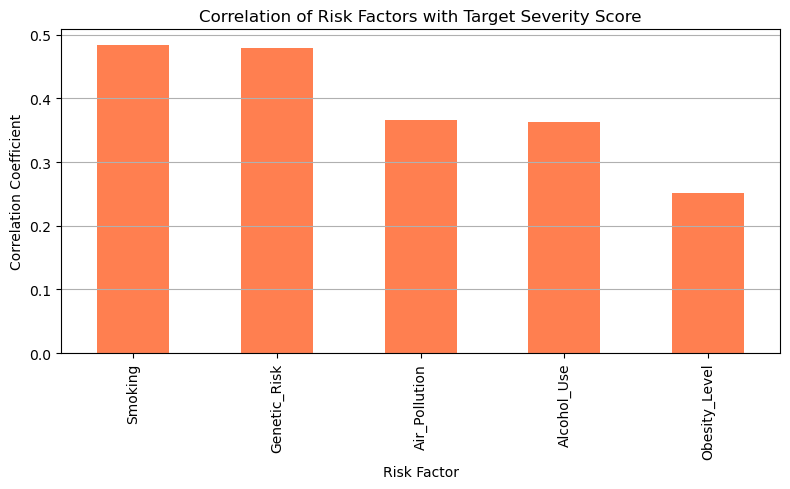

In [12]:
# List of risk factors
risk_factors = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

# Calculate correlation with Severity Score
correlation = df[risk_factors + ['Target_Severity_Score']].corr()

# Extract only correlations with Severity_Score
severity_corr = correlation['Target_Severity_Score'].drop('Target_Severity_Score')

# Plot the correlations

plt.figure(figsize=(8,5))
severity_corr.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Correlation of Risk Factors with Target Severity Score')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Risk Factor')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Smoking and Genetic Risk have the strongest connection to higher cancer severity scores.

Air Pollution and Alcohol Use also show a moderate connection.

Obesity has the lowest correlation, meaning it’s linked to severity, but not as strongly as the others.



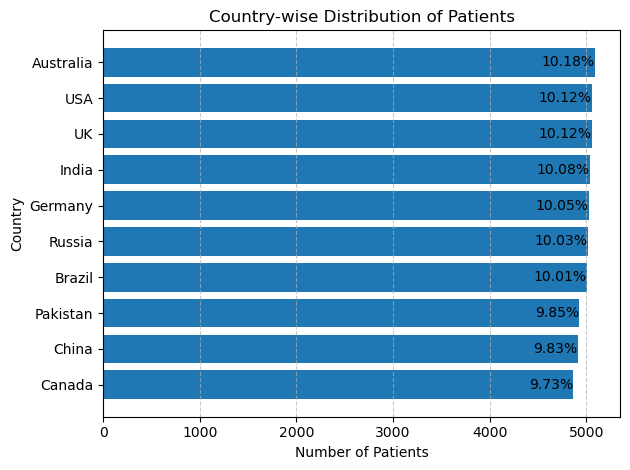

In [13]:
country_counts = df['Country'].value_counts().sort_values(ascending=True)

bars = plt.barh(country_counts.index, country_counts.values)

for bar in bars:
    xval = bar.get_width()
    percentage = (xval / df.shape[0]) * 100
    plt.text(xval - 5, bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', 
             va='center', ha='right')

plt.xlabel('Number of Patients')
plt.ylabel('Country')
plt.title('Country-wise Distribution of Patients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The patient distribution is very evenly spread across countries.

Top three countries: Australia (10.18%), USA (10.12%), and UK (10.12%).

The lowest is Canada (9.73%), which is only slightly behind the rest.

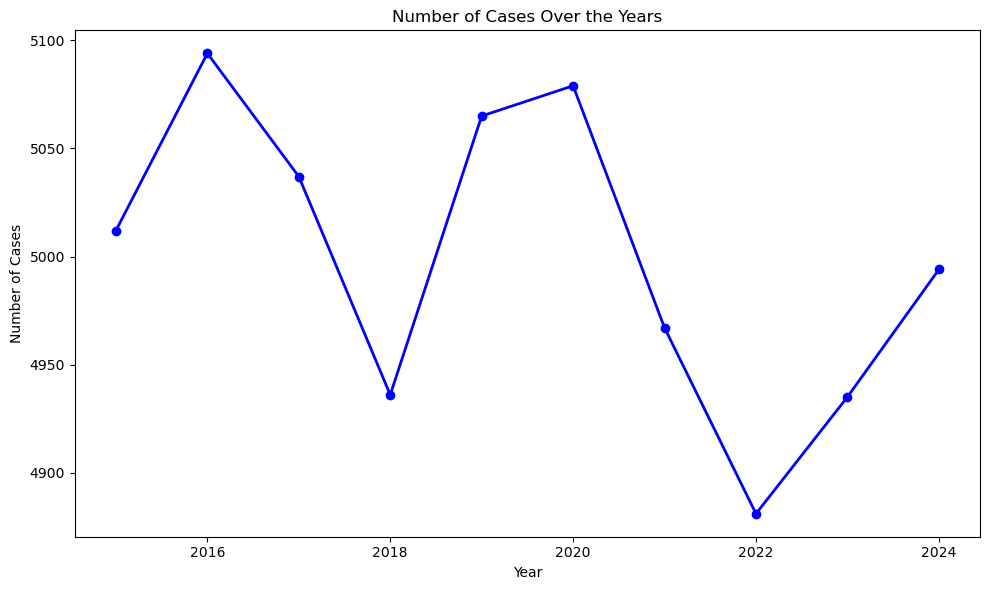

In [14]:
# Group by Year and count the number of cases
yearly_cases = df.groupby('Year').size()

# Plot the number of cases over the years
plt.figure(figsize=(10,6))
plt.plot(yearly_cases.index, yearly_cases.values, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Number of Cases Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
#plt.xticks(yearly_cases.index)  # Optional: Rotate x-axis ticks if needed
plt.tight_layout()
plt.show()

The total number of cases each year is relatively stable, hovering around 5000 cases per year.

There are slight ups and downs, with a noticeable dip around 2018 and 2022, and peaks in 2016 and 2020.

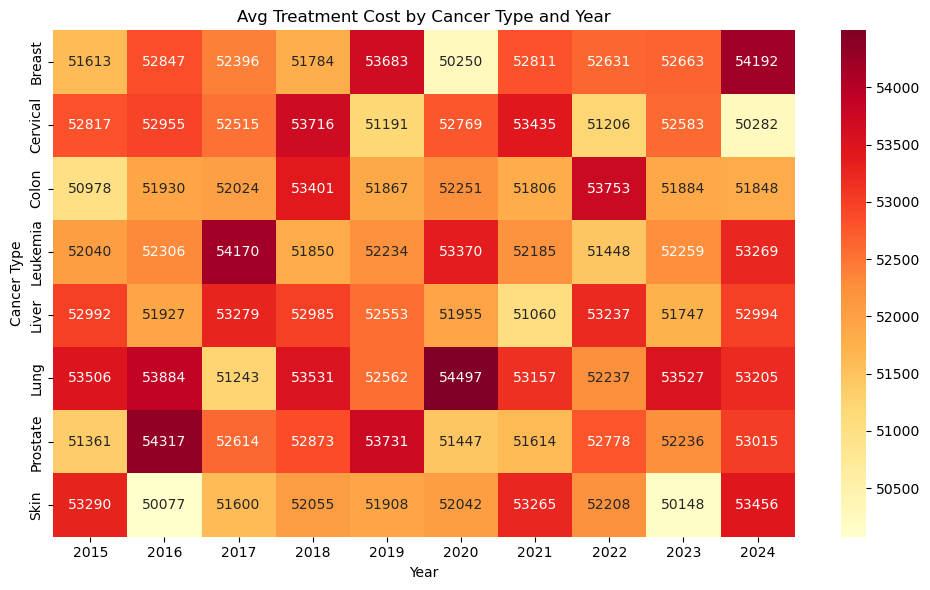

In [15]:
heatmap_data = df.pivot_table(index='Cancer_Type', columns='Year', values='Treatment_Cost_USD', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd')

plt.title('Avg Treatment Cost by Cancer Type and Year')
plt.xlabel('Year')
plt.ylabel('Cancer Type')
plt.tight_layout()
plt.show()


Treatment costs vary across cancer types and years.

Some years have notably higher costs, like:

Breast cancer in 2024 ($54,192) — the highest in the dataset.

Lung cancer in 2020 ($54,497) — another significant peak.

The lowest costs appear in a few spots, like:

Skin cancer in 2022 ($50,148).

Breast cancer in 2020 ($50,250).

These shifts could be due to advances in treatment, inflation, changes in medical protocols, or healthcare policies.



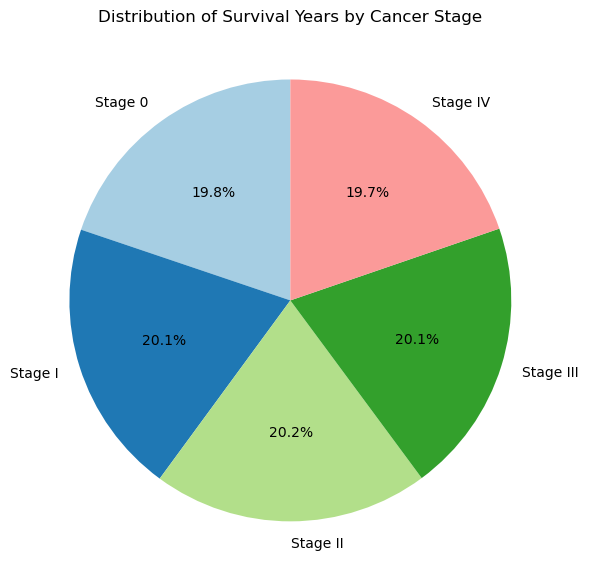

In [16]:


# Group the data by 'Cancer_Stage' and calculate the total 'Survival_Years' for each stage
cancer_stage_survival = df.groupby('Cancer_Stage')['Survival_Years'].sum()

# Plot a pie chart of the total Survival Years by Cancer Stage
plt.figure(figsize=(6,6))
plt.pie(cancer_stage_survival, labels=cancer_stage_survival.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Survival Years by Cancer Stage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


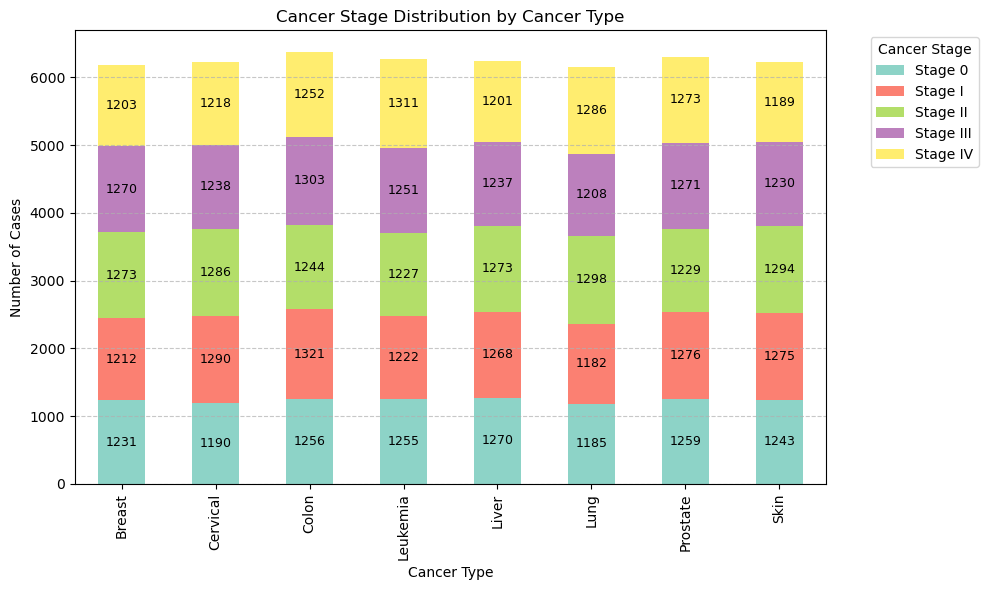

In [17]:
# Create a count table
pivot_table = df.groupby(['Cancer_Type', 'Cancer_Stage']).size().unstack(fill_value=0)

# Plot
ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')

# Add value labels
for bar_group in ax.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,              # x-position
                bar.get_y() + height / 2,                       # y-position
                f'{int(height)}',                               # label
                ha='center', va='center', fontsize=9, color='black'
            )

# Customize
plt.title('Cancer Stage Distribution by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Cases')
plt.legend(title='Cancer Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

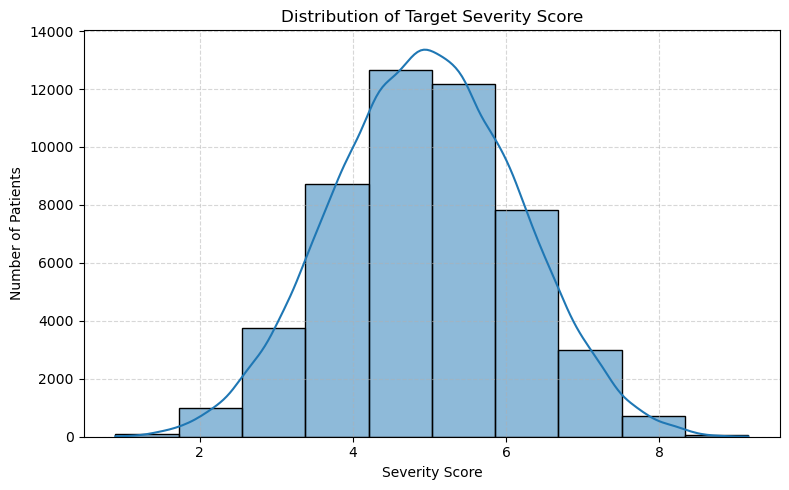

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Target_Severity_Score'], bins=10, kde=True, edgecolor='black')
plt.title("Distribution of Target Severity Score")
plt.xlabel("Severity Score")
plt.ylabel("Number of Patients")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The scores form a bell-shaped curve, peaking around a score of 5. This is a normal distribution, which is common in statistics. It suggests the majority of patients have moderate severity, with fewer having very low or very high severity

In [19]:
df = (
    df.drop(columns=['Patient_ID'])
      .assign(
          Gender = LabelEncoder().fit_transform(df['Gender']),
          Country = LabelEncoder().fit_transform(df['Country']),
          Cancer_Type = LabelEncoder().fit_transform(df['Cancer_Type']),
          Cancer_Stage = df['Cancer_Stage'].map({'Stage 0': 0, 'Stage I': 1, 'Stage II': 2, 'Stage III': 3, 'Stage IV': 4})
      )
)

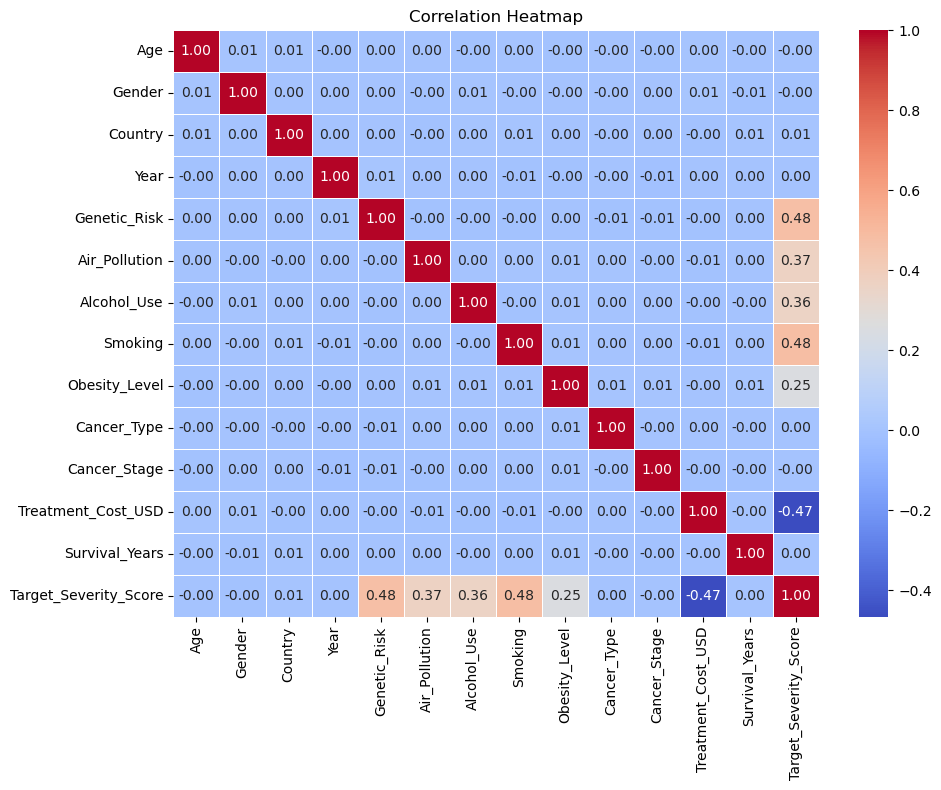

In [20]:
# Compute correlation matrix directly from df
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##  Features positively correlated with Target_Severity_Score:
Smoking (0.48)
→ More smoking is linked with higher severity.

Genetic_Risk (0.48)
→ Higher genetic risk = higher severity.

Air_Pollution (0.37) and Alcohol_Use (0.36)
→ These environmental and lifestyle factors slightly increase severity.

Obesity_Level (0.25)
→ Obesity has a weak positive correlation with severity.

🔻 Negative Correlation:
Treatment_Cost_USD (-0.47)
→ Surprisingly, higher treatment cost is linked with lower severity.
This might suggest early-stage patients (with lower severity) get more or prolonged treatments.

### No significant correlation with severity score:
Age, Gender, Country, Year, Cancer Type, Cancer Stage, Survival Years
→ These don't show strong linear relationships with severity score in this dataset.

In [21]:
import ppscore as pps

pps_matrix = pps.predictors(df, y="Target_Severity_Score")
pps_matrix = pps_matrix.sort_values("ppscore", ascending=False)
print(pps_matrix)


                     x                      y   ppscore        case  \
0         Genetic_Risk  Target_Severity_Score  0.107037  regression   
1              Smoking  Target_Severity_Score  0.105674  regression   
2        Air_Pollution  Target_Severity_Score  0.054823  regression   
3          Alcohol_Use  Target_Severity_Score  0.047397  regression   
4        Obesity_Level  Target_Severity_Score  0.012846  regression   
5                  Age  Target_Severity_Score  0.000000  regression   
6               Gender  Target_Severity_Score  0.000000  regression   
7              Country  Target_Severity_Score  0.000000  regression   
8                 Year  Target_Severity_Score  0.000000  regression   
9          Cancer_Type  Target_Severity_Score  0.000000  regression   
10        Cancer_Stage  Target_Severity_Score  0.000000  regression   
11  Treatment_Cost_USD  Target_Severity_Score  0.000000  regression   
12      Survival_Years  Target_Severity_Score  0.000000  regression   

    i

In [22]:


# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Function to find outliers using IQR for each column
def detect_outliers_iqr(df):
    outlier_indices = {}

    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Get index of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices[col] = outliers.tolist()

    return outlier_indices

# Run the function
outlier_dict = detect_outliers_iqr(numeric_df)

# Print number of outliers for each column
for col, indices in outlier_dict.items():
    print(f"{col}: {len(indices)} outliers")


Age: 0 outliers
Gender: 0 outliers
Country: 0 outliers
Year: 0 outliers
Genetic_Risk: 0 outliers
Air_Pollution: 0 outliers
Alcohol_Use: 0 outliers
Smoking: 0 outliers
Obesity_Level: 0 outliers
Cancer_Type: 0 outliers
Cancer_Stage: 0 outliers
Treatment_Cost_USD: 0 outliers
Survival_Years: 0 outliers
Target_Severity_Score: 151 outliers


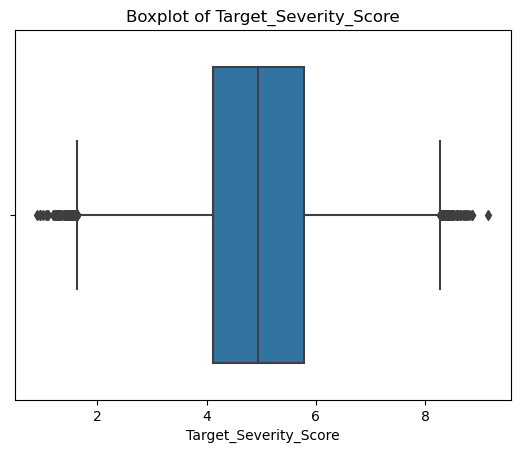

In [23]:


sns.boxplot(x=df['Target_Severity_Score'])
plt.title("Boxplot of Target_Severity_Score")
plt.show()


In [24]:
# Winsorizing: Capping the outliers
lower_cap = df['Target_Severity_Score'].quantile(0.01)
upper_cap = df['Target_Severity_Score'].quantile(0.99)

df['Target_Severity_Score'] = df['Target_Severity_Score'].clip(lower=lower_cap, upper=upper_cap)


In [25]:

features = ['Smoking', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Obesity_Level']
X = df[features]
y = df['Target_Severity_Score']

X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.2)

In [26]:

# Step 3: Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Step 4: Train model

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

# Step 5: Predict
y_pred = linear_regression_model.predict(X_test_scaled)

# Step 6: Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("linear regression : Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

linear regression : Model Performance:
Mean Squared Error (MSE): 0.30
R-squared (R2): 0.79


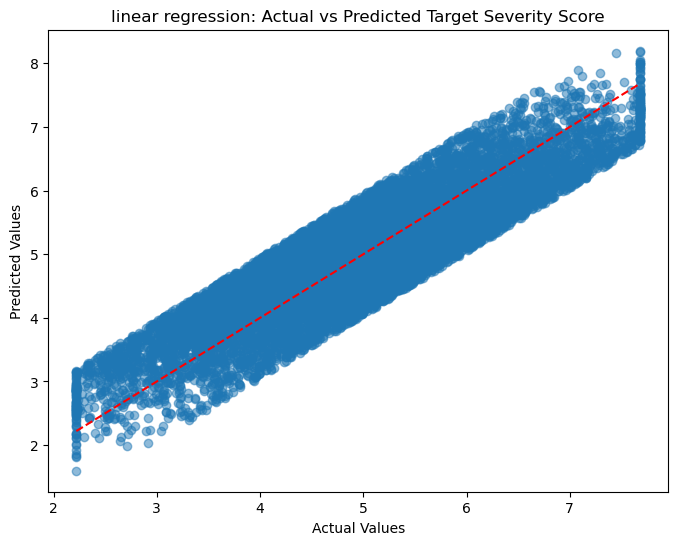

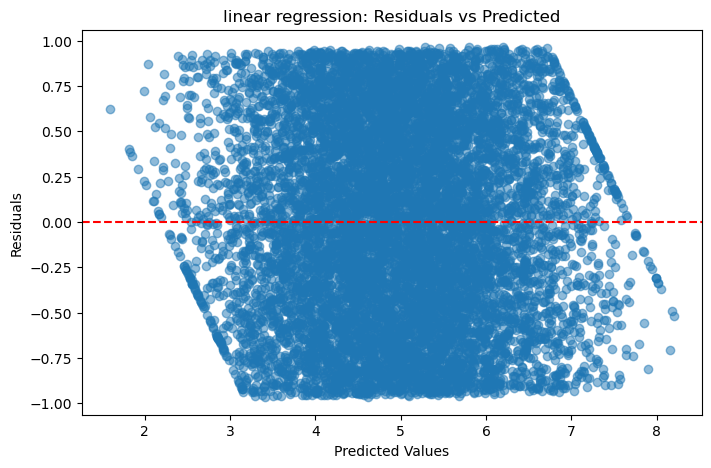

In [28]:
# Step 7: Visualize
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('linear regression: Actual vs Predicted Target Severity Score')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("linear regression: Residuals vs Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


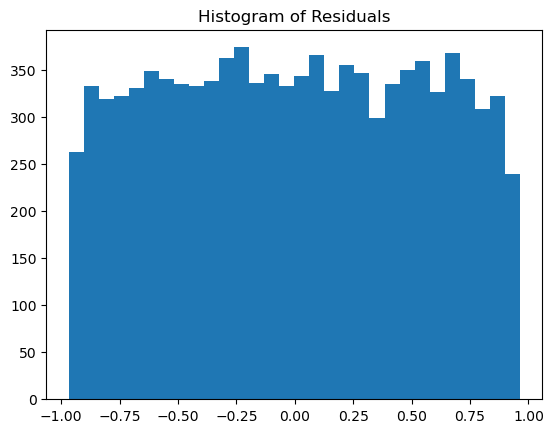

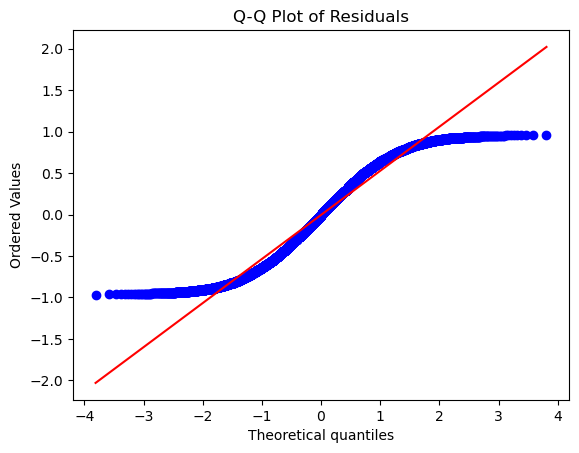

In [29]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogram
plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


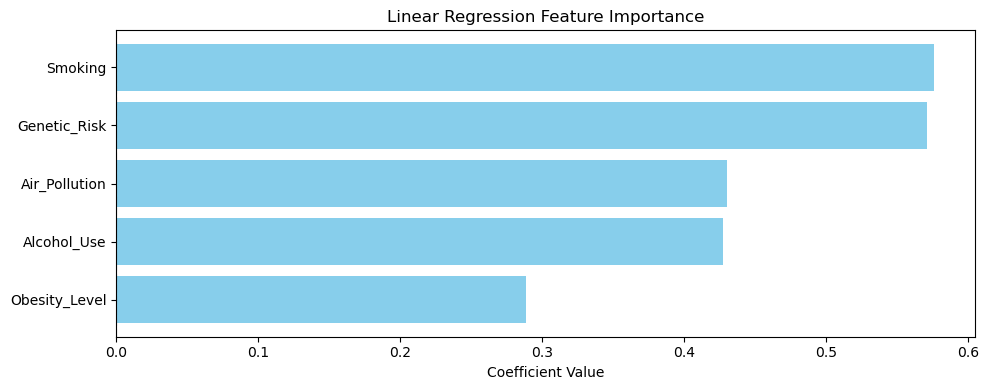

In [30]:
# Step 7: Interpret coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': linear_regression_model.coef_
})

# Sort by absolute value of coefficients (optional but useful)
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 4))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Feature Importance')
plt.axvline(0, color='gray', linestyle='--')  # Add vertical line at 0
plt.gca().invert_yaxis()  # Highest coefficient on top
plt.tight_layout()
plt.show()


In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Ridge model
ridge_model = Ridge(alpha=1.0)  # You can tune alpha
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression -> MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")


Ridge Regression -> MSE: 0.2951, R²: 0.7869


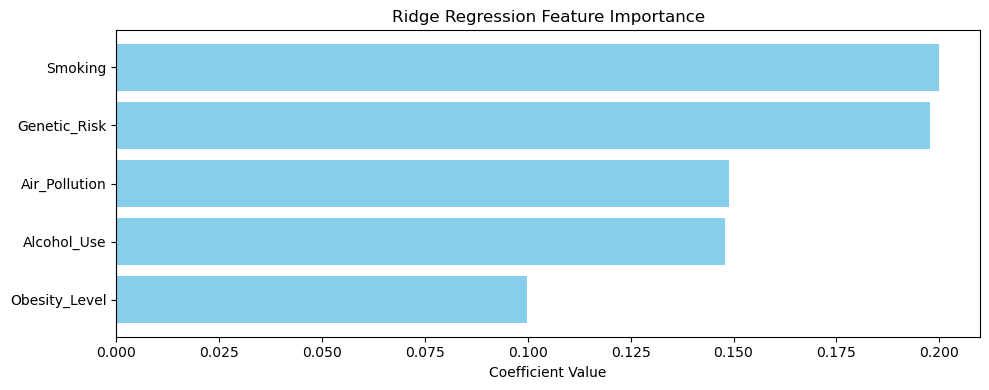

In [32]:
# Step 7: Interpret coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': ridge_model.coef_
})

# Sort by absolute value of coefficients (optional but useful)
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 4))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression Feature Importance')
plt.axvline(0, color='gray', linestyle='--')  # Add vertical line at 0
plt.gca().invert_yaxis()  # Highest coefficient on top
plt.tight_layout()
plt.show()

In [33]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest -> MSE: {mse_rf:.4f} R2: {r2_rf:.4f}")


Random Forest -> MSE: 0.3222 R2: 0.7674


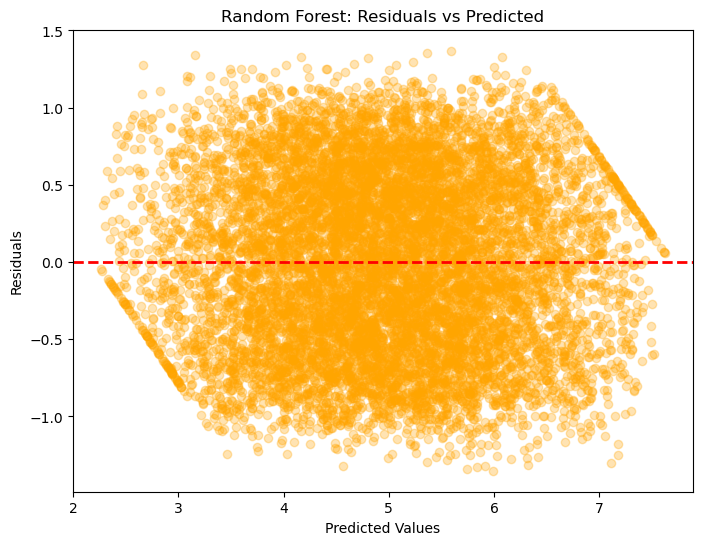

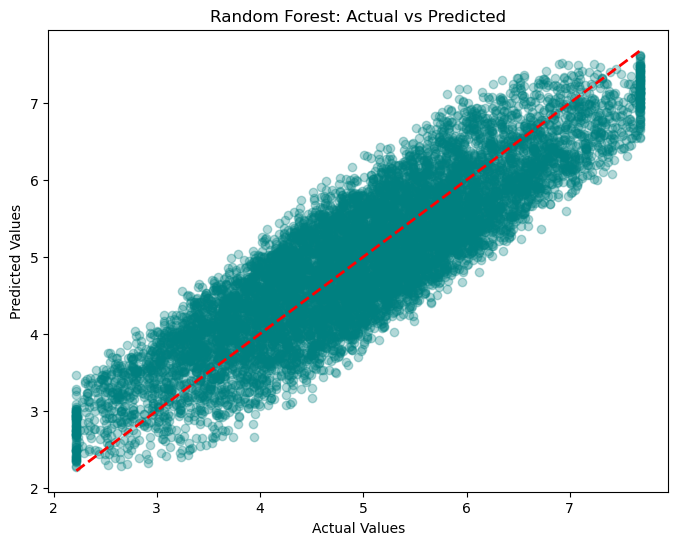

In [34]:
# --- Predict using the Random Forest model ---
y_pred_rf = rf_model.predict(X_test)

# --- Calculate residuals ---
residuals_rf = y_test - y_pred_rf

# --- Residuals vs. Predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.3, color='orange')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest: Residuals vs Predicted')
plt.show()

# --- Actual vs. Predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()


In [35]:
# Initialize model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost -> MSE: {mse_xgb:.4f} R2: {r2_xgb:.4f}")


XGBoost -> MSE: 0.3230 R2: 0.7668


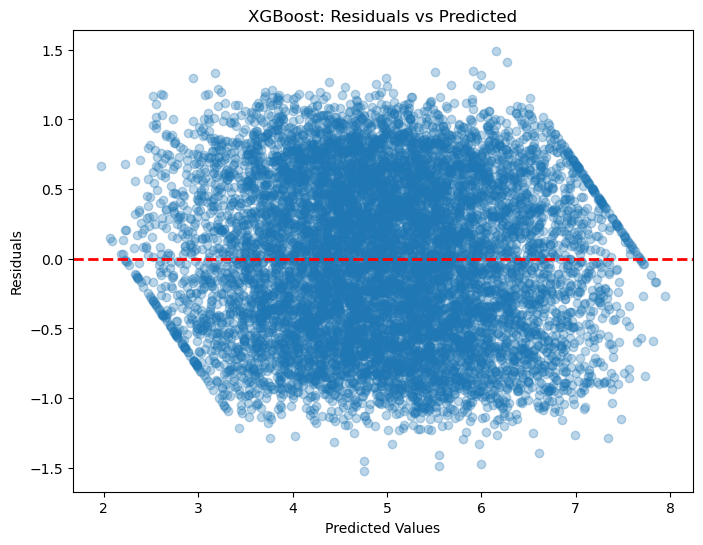

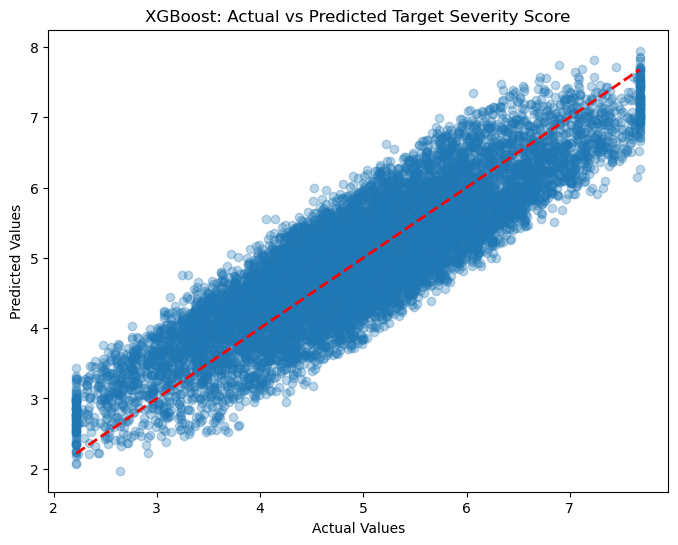

In [36]:
# Predict using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_xgb

# --- Residuals vs. Predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('XGBoost: Residuals vs Predicted')
plt.show()

# --- Actual vs. Predicted ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost: Actual vs Predicted Target Severity Score')
plt.show()

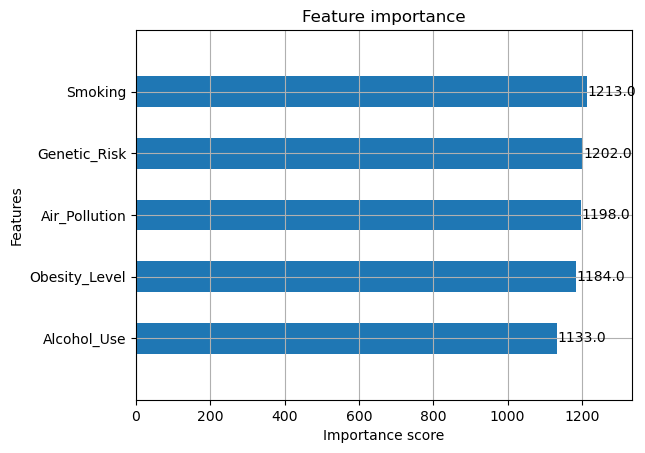

In [37]:
xgb.plot_importance(xgb_model, height=0.5)
plt.show()

In [38]:


# Define model performance data
model_results = {
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest", "XGBoost"],
    "Mean Squared Error (MSE)": [0.2900, 0.2896, 0.3184, 0.3199],
    "R-squared (R²)": [0.7900, 0.7923, 0.7716, 0.7706]
}

# Create DataFrame
results_df = pd.DataFrame(model_results)

# Sort by R-squared descending for clarity (optional)
results_df = results_df.sort_values(by="R-squared (R²)", ascending=False).reset_index(drop=True)

# Display table
print(results_df)


               Model  Mean Squared Error (MSE)  R-squared (R²)
0   Ridge Regression                    0.2896          0.7923
1  Linear Regression                    0.2900          0.7900
2      Random Forest                    0.3184          0.7716
3            XGBoost                    0.3199          0.7706


Best Model: Ridge Regression

Highest R² (0.7923): Indicates the best fit among all models — it explains ~79% of the variance in cancer severity scores.

Lowest MSE (0.2896): Implies better prediction accuracy and lower average error.

Regularization Strength: Ridge helped reduce overfitting compared to plain Linear Regression, making it more robust on unseen data.

While tree-based models (Random Forest, XGBoost) are powerful, they slightly underperformed and showed more variance — Ridge offered the best trade-off between accuracy and generalization.

